## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
A1: \quad \boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
A2: \quad \boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


We start with the definition of the OLS estimator

$$
\hat{\boldsymbol{\beta}}_{OLS} = (X^\top X)^{-1} X^\top \boldsymbol{y}.
$$

From the data generating process we have

$$
\boldsymbol{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}, \quad 
\boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2 I).
$$

Insert this expression for $\boldsymbol{y}$ into the estimator (this step is using the assumption (A1) that the  ideal $\beta$ is expressed from $X$ where only noise is stochastic)

$$
\hat{\boldsymbol{\beta}}_{OLS} = (X^\top X)^{-1} X^\top (X \boldsymbol{\beta} + \boldsymbol{\epsilon}).
$$

Expand the product:

$$
\hat{\boldsymbol{\beta}}_{OLS} 
= (X^\top X)^{-1} X^\top X \boldsymbol{\beta} \;+\; (X^\top X)^{-1} X^\top \boldsymbol{\epsilon}.
$$

Simplify:

$$
\hat{\boldsymbol{\beta}}_{OLS} 
= \boldsymbol{\beta} + (X^\top X)^{-1} X^\top \boldsymbol{\epsilon}.
$$

Now take the expectation, using linearity of expectation and the fact that $\boldsymbol{\beta}$ is non-stochastic while $\mathbb{E}[\boldsymbol{\epsilon}] = 0$:
$$
\mathbb{E}[\hat{\boldsymbol{\beta}}_{OLS}]
= \mathbb{E}[\boldsymbol{\beta} + (X^\top X)^{-1} X^\top \boldsymbol{\epsilon}].
$$

Since $\boldsymbol{\beta}$ is non-stochastic and $\mathbb{E}[\boldsymbol{\epsilon}] = 0$:

$$
\mathbb{E}[\hat{\boldsymbol{\beta}}_{OLS}] 
= \boldsymbol{\beta} + (X^\top X)^{-1} X^\top \,\mathbb{E}[\boldsymbol{\epsilon}],
$$

$$
\mathbb{E}[\hat{\boldsymbol{\beta}}_{OLS}] = \boldsymbol{\beta}.
$$

Hence, the OLS estimator is **unbiased**:

$$
\mathbb{E}[\hat{\boldsymbol{\beta}}_{OLS}] = \boldsymbol{\beta}.
$$


**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


We start from the expression for the OLS estimator obtained above:

$$
\hat{\boldsymbol{\beta}}_{OLS} 
= \boldsymbol{\beta} + (X^\top X)^{-1} X^\top \boldsymbol{\epsilon}.
$$

The variance operator ignores constants, so only the second term contributes. Thus,

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{OLS}) 
= \operatorname{Var}\!\left( (X^\top X)^{-1} X^\top \boldsymbol{\epsilon} \right).
$$

Factor out the non-random matrices:

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{OLS}) 
= (X^\top X)^{-1} X^\top \, \operatorname{Var}(\boldsymbol{\epsilon}) \, X (X^\top X)^{-1}.
$$

From the data generating assumption we know

$$
\operatorname{Var}(\boldsymbol{\epsilon}) = \sigma^2 I.
$$

Substitute this:

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{OLS}) 
= (X^\top X)^{-1} X^\top \, (\sigma^2 I) \, X (X^\top X)^{-1}.
$$

Simplify:

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{OLS}) 
= \sigma^2 (X^\top X)^{-1} X^\top X (X^\top X)^{-1}.
$$

Since $X^\top X$ is symmetric and invertible (under the Gauss-Markov assumptions, i.e no perfect multicollinearity / full column rank assumption, (Wikipedia contributors, 2025)).
):

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{OLS}) 
= \sigma^2 (X^\top X)^{-1}.
$$

Hence, we have shown that:

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{OLS}) = \sigma^2 (X^\top X)^{-1}.
$$

Reference:

Wikipedia contributors. (2025, March 24). Gauss–Markov theorem. In Wikipedia. Retrieved September 10, 2025, from https://en.wikipedia.org/w/index.php?title=Gauss%E2%80%93Markov_theorem&oldid=1282157188

## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We start with the definition of the Ridge estimator:

$$
\hat{\boldsymbol{\beta}}_{Ridge} 
= (X^\top X + \lambda I_p)^{-1} X^\top \boldsymbol{y},
$$

where $\lambda > 0$ is the regularization parameter and $I_p$ is the $p \times p$ identity matrix.

From the data generating process we have

$$
\boldsymbol{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}, 
\quad \boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2 I).
$$

Insert this into the estimator:

$$
\hat{\boldsymbol{\beta}}_{Ridge} 
= (X^\top X + \lambda I_p)^{-1} X^\top (X \boldsymbol{\beta} + \boldsymbol{\epsilon}).
$$

Expand:

$$
\hat{\boldsymbol{\beta}}_{Ridge} 
= (X^\top X + \lambda I_p)^{-1} X^\top X \boldsymbol{\beta} 
\;+\; (X^\top X + \lambda I_p)^{-1} X^\top \boldsymbol{\epsilon}.
$$

Now take the expectation, using linearity and $\mathbb{E}[\boldsymbol{\epsilon}] = 0$ so that last term zeros:

$$
\mathbb{E}[\hat{\boldsymbol{\beta}}_{Ridge}]
= (X^\top X + \lambda I_p)^{-1} X^\top X \boldsymbol{\beta}.
$$

Thus we have shown:

$$
\mathbb{E}[\hat{\boldsymbol{\beta}}_{Ridge}] 
= (X^\top X + \lambda I_p)^{-1} (X^\top X) \boldsymbol{\beta}.
$$

Note: 

Therefore by inspection of the expression we see
$$
\mathbb{E}[\hat{\boldsymbol{\beta}}_{Ridge}] = \mathbb{E}[\hat{\boldsymbol{\beta}}_{OLS}] \iff \lambda = 0
$$
Hence for any $\lambda > 0$ the Ridge estimator is biased.

**b)** Why do we say that Ridge regression gives a biased estimate? Is this a problem?


According to the bias–variance tradeoff (Hastie, Tibshirani, and Friedman, 2009, p.223), introducing bias can be beneficial.  
Ridge adds bias by shrinking the estimator coefficients, but in turn it reduces variance — notably when predictors are highly correlated and the feature matrix $X$ is close to singular.  

Its strength lies under conditions of multicollinearity or high dimensionality, where it effectively trades some bias for lower variance.  
In practical settings, this is valuable: measurement noise, limited sample sizes, or strongly correlated features can make the OLS estimator oversensitive and unstable. Ridge stabilizes the solution, lowering mean squared error even though it is biased.

Reference:

Trevor Hastie, Robert Tibshirani, and Jerome Friedman. 
The Elements of Statistical Learning: Data Mining, Inference, and Prediction}. 
Second Edition. Springer, 2009.



**c)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


The proof in structure is similar to the others. 
We start from the expression of the Ridge estimator:

$$
\hat{\boldsymbol{\beta}}_{Ridge} 
= (X^\top X + \lambda I_p)^{-1} X^\top \boldsymbol{y}.
$$

From the data generating process we have

$$
\boldsymbol{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}, 
\quad \boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2 I).
$$

Insert this into the estimator:

$$
\hat{\boldsymbol{\beta}}_{Ridge} 
= (X^\top X + \lambda I_p)^{-1} X^\top (X \boldsymbol{\beta} + \boldsymbol{\epsilon}).
$$

Expand:

$$
\hat{\boldsymbol{\beta}}_{Ridge} 
= (X^\top X + \lambda I_p)^{-1} X^\top X \boldsymbol{\beta} 
\;+\; (X^\top X + \lambda I_p)^{-1} X^\top \boldsymbol{\epsilon}.
$$

The first term is deterministic by assumption, hence only the second contributes to the variance:

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{Ridge}) 
= \operatorname{Var}\!\left( (X^\top X + \lambda I_p)^{-1} X^\top \boldsymbol{\epsilon} \right).
$$

Using the variance matrix rule for independent "errors" $\operatorname{Var}(A\boldsymbol{\epsilon}) = A \, \operatorname{Var}(\boldsymbol{\epsilon}) \, A^\top$:

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{Ridge}) 
= (X^\top X + \lambda I_p)^{-1} X^\top \, \operatorname{Var}(\boldsymbol{\epsilon}) \, X \big[(X^\top X + \lambda I_p)^{-1}\big]^\top.
$$

Since $\operatorname{Var}(\boldsymbol{\epsilon}) = \sigma^2 I$:

$$
\operatorname{Var}(\hat{\boldsymbol{\beta}}_{Ridge}) 
= \sigma^2 (X^\top X + \lambda I_p)^{-1} X^\top X \big[(X^\top X + \lambda I_p)^{-1}\big]^\top.
$$


Note:


We can now see that as $\lambda \to \infty$, the shrinkage term $(X^\top X + \lambda I_p)^{-1}$ goes to zero, so

$$
\lim_{\lambda \to \infty} \operatorname{Var}(\hat{\boldsymbol{\beta}}_{Ridge}) = 0.
$$

Such a dynamic clearly invokes the general bias-variance tradeoff, as $\lambda$ increases so does bias, concurrently the estimator variance shrinks


## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$


---
We want to decompose the mean squared error

$$
\mathbb{E}[(y - \hat{y})^2].
$$

Start with the data generating process:

$$
y = f(x) + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2).
$$

So,

$$
\mathbb{E}[(y - \hat{y})^2] = \mathbb{E}[(f(x) + \epsilon - \hat{y})^2].
$$

Expand:

$$
\mathbb{E}[(f(x) - \hat{y} + \epsilon)^2] 
= \mathbb{E}[(f(x) - \hat{y})^2] + 2\mathbb{E}[(f(x) - \hat{y})\epsilon] + \mathbb{E}[\epsilon^2].
$$

Since $\epsilon$ is independent with zero mean, the cross-term vanishes:

$$
\mathbb{E}[(y - \hat{y})^2] = \mathbb{E}[(f(x) - \hat{y})^2] + \sigma^2.
$$

---

Now decompose the first term by adding and subtracting $\mathbb{E}[\hat{y}]$ ((Hastie, Tibshirani, and Friedman, 2009, p.223)):

$$
\mathbb{E}[(f(x) - \hat{y})^2] 
= \mathbb{E}\big[(f(x) - \mathbb{E}[\hat{y}] + \mathbb{E}[\hat{y}] - \hat{y})^2\big].
$$

Expand:

$$
= \mathbb{E}\big[(f(x) - \mathbb{E}[\hat{y}])^2\big] 
+ \mathbb{E}\big[(\hat{y} - \mathbb{E}[\hat{y}])^2\big] 
+ 2\mathbb{E}\big[(f(x) - \mathbb{E}[\hat{y}])(\mathbb{E}[\hat{y}] - \hat{y})\big].
$$

The cross-term vanishes because $(f(x) - \mathbb{E}[\hat{y}])$ is constant w.r.t. the randomness in $\hat{y}$. So:

$$
\mathbb{E}[(f(x) - \hat{y})^2] 
= (f(x) - \mathbb{E}[\hat{y}])^2 + \operatorname{Var}(\hat{y}).
$$

---

Thus the full decomposition is

$$
\mathbb{E}[(y - \hat{y})^2] 
= (f(x) - \mathbb{E}[\hat{y}])^2 + \operatorname{Var}(\hat{y}) + \sigma^2.
$$

---

Identify terms:

- Bias: $\operatorname{Bias}[\hat{y}]^2 = (f(x) - \mathbb{E}[\hat{y}])^2$  
- Variance: $\operatorname{Var}[\hat{y}] = \mathbb{E}[(\hat{y} - \mathbb{E}[\hat{y}])^2]$  
- Nondeterministic noise: $\sigma^2$

So:

$$
\mathbb{E}[(y - \hat{y})^2] 
= \operatorname{Bias}[\hat{y}]^2 + \operatorname{Var}[\hat{y}] + \sigma^2.
$$


**b)** Explain what the terms mean and discuss their interpretations.


The decomposition above splits predictive error into three conceptual parts. 
- The irreducibile error comes from the fact of sampling, no matter how we well we estimate $f(x)$ noise is assumed and this variance cannot be reduce unless $\epsilon$ is assumed $\sim \sigma^2 = 0$
- Bias can be understood as systematic error, or the squared distance between the prediction expectation and the "true function" (underlying data-generating mechanism). Importantly, if the model class (e.g linear model) cannot represent the true function (e.g nonlinear function), bias is high. The more flexible the model is, the more it can reduce bias. 

Forexample, for basis expansions (polynomials, splines), the model bias can be made arbitrarily small by letting the number of basis functions $p$ grow, since such bases are dense in the space of continuous functions (Hastie et al., 2009, 233).

- Variance: sensitivity of the estimator to sampling fluctuations. It measures how much $\hat{y}$ (determined by the estimator and noise) varies around its mean $\mathbb{E}[\hat{y}]$ when the training data changes. High variance means the model overfits to noise in the training set.

Hence, in most cases, the total mean squared error is the main metric for model assessment. This is an overarching metric combining the tradeoffs central for model assessment

## Exercise 4: Computing the Bias and Variance

Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.

In [1]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
targets = np.random.rand(bootstraps, n)

# lets simply assume that the truth for comparison is the mean vector of the target
true_values = np.mean(targets, axis=0)

# get MSE
mse = np.mean((targets - predictions)**2)

expected_predictions = np.mean(predictions, axis=0) 
bias_squared = np.mean((expected_predictions - true_values)**2)

variance = np.mean((predictions - expected_predictions)**2)

print(f"MSE: {mse:.4f}")
print(f"Bias**2: {bias_squared:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Bias **2 + Variance: {bias_squared + variance:.4f}")
print(f"Difference (should be approx noise variance): {mse - (bias_squared + variance):.4f}")


MSE: 218.4284
Bias**2: 210.0418
Variance: 8.3027
Bias **2 + Variance: 218.3445
Difference (should be approx noise variance): 0.0839


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.

In [2]:
#the old predictions were 10 units wide, these are now 2 wide (less spread), and we shift + 20 to induce systematic offset (bias)
predictions_high_bias = np.random.rand(bootstraps, n) * 2 + 20  # Less spread, shifted away from targets

#compare with old
true_values = np.mean(targets, axis=0)

#original calculations
mse_orig = np.mean((targets - predictions)**2)
expected_predictions_orig = np.mean(predictions, axis=0)
bias_squared_orig = np.mean((expected_predictions_orig - true_values)**2)
variance_orig = np.mean((predictions - expected_predictions_orig)**2)

#compare w higher bias less spread dataset  
mse_high_bias = np.mean((targets - predictions_high_bias)**2)
expected_predictions_high_bias = np.mean(predictions_high_bias, axis=0)
bias_squared_high_bias = np.mean((expected_predictions_high_bias - true_values)**2)
variance_high_bias = np.mean((predictions_high_bias - expected_predictions_high_bias)**2)

print("Original predictions:")
print(f"  MSE: {mse_orig:.4f}, Bias**2: {bias_squared_orig:.4f}, Variance: {variance_orig:.4f}")
print("\nHigh bias predictions:")
print(f"  MSE: {mse_high_bias:.4f}, Bias**2: {bias_squared_high_bias:.4f}, Variance: {variance_high_bias:.4f}")
print(f"\n Bias**2 delta: {bias_squared_high_bias - bias_squared_orig:.4f}")
print(f"Variance delta: {variance_high_bias - variance_orig:.4f}")
print("\nAs expected, increasing bias shrinks variance, showing the bias–variance tradeoff.")


Original predictions:
  MSE: 218.4284, Bias**2: 210.0418, Variance: 8.3027

High bias predictions:
  MSE: 420.7227, Bias**2: 420.3080, Variance: 0.3320

 Bias**2 delta: 210.2662
Variance delta: -7.9707

As expected, increasing bias shrinks variance, showing the bias–variance tradeoff.


**c)** Change the prediction values in some way to increase the variance while decreasing the bias.

In [3]:
# the old predictions were 10 units wide, these are now 20 wide (more spread), 
# but centered around the targets to keep systematic offset (bias) smaller
predictions_high_var = np.random.rand(bootstraps, n) * 20 + (true_values.mean() - 10)

# compare with old
mse_high_var = np.mean((targets - predictions_high_var)**2)
expected_predictions_high_var = np.mean(predictions_high_var, axis=0)
bias_squared_high_var = np.mean((expected_predictions_high_var - true_values)**2)
variance_high_var = np.mean((predictions_high_var - expected_predictions_high_var)**2)

print("Original predictions:")
print(f"  MSE: {mse_orig:.4f}, Bias**2: {bias_squared_orig:.4f}, Variance: {variance_orig:.4f}")
print("\nHigh variance predictions:")
print(f"  MSE: {mse_high_var:.4f}, Bias**2: {bias_squared_high_var:.4f}, Variance: {variance_high_var:.4f}")
print(f"\n Bias**2 delta: {bias_squared_high_var - bias_squared_orig:.4f}")
print(f"Variance delta: {variance_high_var - variance_orig:.4f}")


Original predictions:
  MSE: 218.4284, Bias**2: 210.0418, Variance: 8.3027

High variance predictions:
  MSE: 33.4696, Bias**2: 0.0368, Variance: 33.3401

 Bias**2 delta: -210.0050
Variance delta: 25.0374


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

np.random.seed(314)

n = 100
bootstraps = 1000

# mixture of gaussians
x = np.linspace(-3, 3, n)
true_function = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))

#add noice
noise = np.random.normal(0, 0.1, n)
y = true_function + noise

# generate texts
x_test = np.linspace(-3, 3, 50)
y_true_test = np.exp(-(x_test**2)) + 1.5 * np.exp(-((x_test - 2) ** 2))

biases = []
variances = []
mses = []
degrees = range(1, 16)  # running over to degree 15

for degree in degrees:
    
    predictions = np.zeros((bootstraps, len(x_test)))
    
    for b in range(bootstraps):
        x_sample, y_sample = resample(x, y, random_state=b)
        
        #using sklearn PolynomialFeatures for simplicity
        poly = PolynomialFeatures(degree=degree)
        X_sample = poly.fit_transform(x_sample.reshape(-1, 1))
        X_test = poly.transform(x_test.reshape(-1, 1))
        
        #fit by sklearns model
        model = LinearRegression()
        model.fit(X_sample, y_sample)
        
        #make predictions on test set
        predictions[b, :] = model.predict(X_test)
    
    expected_predictions = np.mean(predictions, axis=0)  
    bias_squared = np.mean((expected_predictions - y_true_test)**2)
    variance = np.mean(np.var(predictions, axis=0))  
    mse = np.mean((predictions - y_true_test)**2)  
    
    biases.append(bias_squared)
    variances.append(variance)
    mses.append(mse)
    
    print(f"Degree {degree}: " 
          f"Bias = {bias_squared:.4f}, " 
          f"Var = {variance:.4f}, "
          f"MSE = {mse:.4f}")
print("\nAs we can see, bias decreases monotonically with degree, variance increases over doubles at degree 14, and MSE reaches minimum at degree 10 ")

Degree 1: Bias = 0.0675, Var = 0.0019, MSE = 0.0694
Degree 2: Bias = 0.0469, Var = 0.0024, MSE = 0.0493
Degree 3: Bias = 0.0217, Var = 0.0011, MSE = 0.0229
Degree 4: Bias = 0.0211, Var = 0.0014, MSE = 0.0225
Degree 5: Bias = 0.0141, Var = 0.0014, MSE = 0.0155
Degree 6: Bias = 0.0100, Var = 0.0023, MSE = 0.0122
Degree 7: Bias = 0.0064, Var = 0.0037, MSE = 0.0101
Degree 8: Bias = 0.0022, Var = 0.0026, MSE = 0.0049
Degree 9: Bias = 0.0027, Var = 0.0053, MSE = 0.0079
Degree 10: Bias = 0.0008, Var = 0.0020, MSE = 0.0027
Degree 11: Bias = 0.0008, Var = 0.0029, MSE = 0.0037
Degree 12: Bias = 0.0008, Var = 0.0078, MSE = 0.0085
Degree 13: Bias = 0.0017, Var = 0.0151, MSE = 0.0168
Degree 14: Bias = 0.0027, Var = 0.0321, MSE = 0.0348
Degree 15: Bias = 0.0016, Var = 0.0853, MSE = 0.0869

As we can see, bias decreases monotonically with degree, variance increases over doubles at degree 14, and MSE reaches minimum at degree 10 


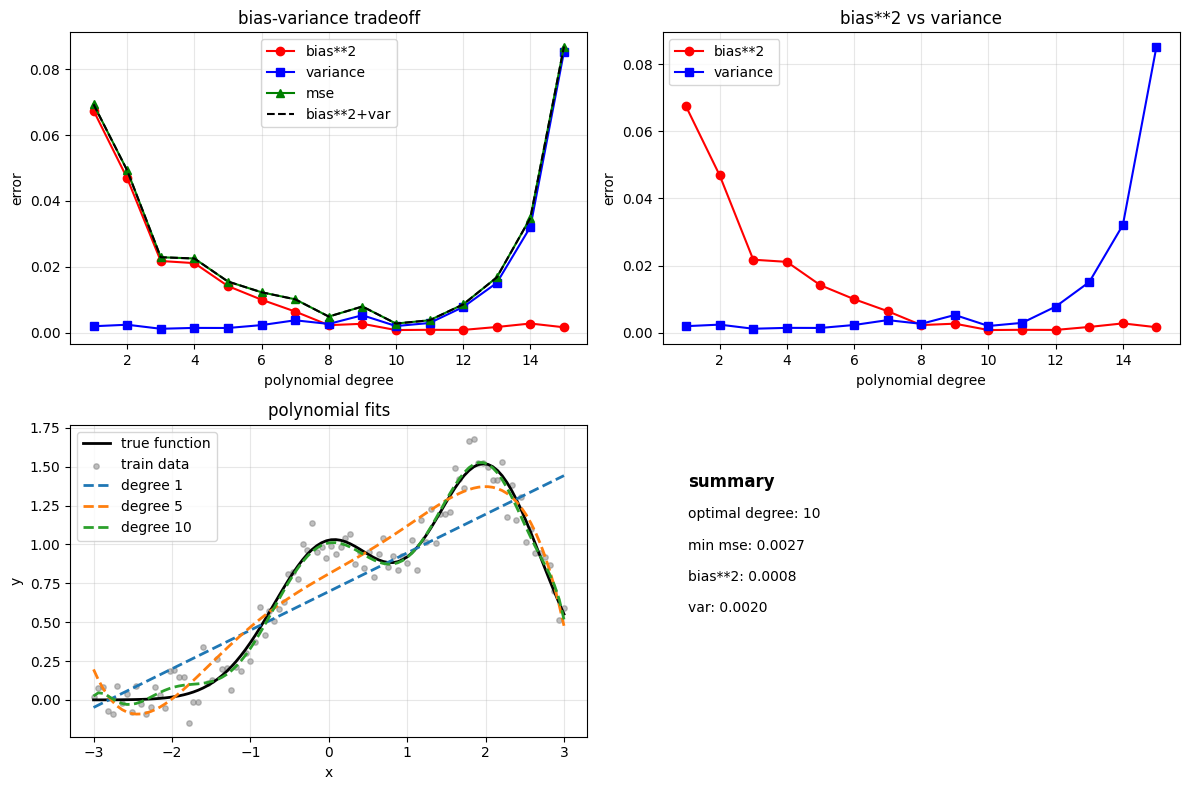


degree  bias**2    var       mse      bias**2+var
-------------------------------------------------------
1      0.0675   0.0019   0.0694   0.0694
2      0.0469   0.0024   0.0493   0.0493
3      0.0217   0.0011   0.0229   0.0229
4      0.0211   0.0014   0.0225   0.0225
5      0.0141   0.0014   0.0155   0.0155
6      0.0100   0.0023   0.0122   0.0122
7      0.0064   0.0037   0.0101   0.0101
8      0.0022   0.0026   0.0049   0.0049
9      0.0027   0.0053   0.0079   0.0079
10     0.0008   0.0020   0.0027   0.0027
11     0.0008   0.0029   0.0037   0.0037
12     0.0008   0.0078   0.0085   0.0085
13     0.0017   0.0151   0.0168   0.0168
14     0.0027   0.0321   0.0348   0.0348
15     0.0016   0.0853   0.0869   0.0869


In [5]:
plt.figure(figsize=(12, 8))

# bias, variance, mse
plt.subplot(2, 2, 1)
plt.plot(degrees, biases, 'r-o', label='bias**2')
plt.plot(degrees, variances, 'b-s', label='variance')
plt.plot(degrees, mses, 'g-^', label='mse')
plt.plot(degrees, np.array(biases) + np.array(variances), 'k--', label='bias**2+var')
plt.xlabel('polynomial degree')
plt.ylabel('error')
plt.title('bias-variance tradeoff')
plt.legend()
plt.grid(alpha=0.3)

# bias vs variance
plt.subplot(2, 2, 2)
plt.plot(degrees, biases, 'r-o', label='bias**2')
plt.plot(degrees, variances, 'b-s', label='variance')
plt.xlabel('polynomial degree')
plt.ylabel('error')
plt.title('bias**2 vs variance')
plt.legend()
plt.grid(alpha=0.3)

# example fits
plt.subplot(2, 2, 3)
x_plot = np.linspace(-3, 3, 100)
y_true_plot = np.exp(-(x_plot**2)) + 1.5*np.exp(-((x_plot-2)**2))
plt.plot(x_plot, y_true_plot, 'k-', lw=2, label='true function')
plt.scatter(x, y, s=15, alpha=0.5, color='gray', label='train data')
for deg in [1, 5, 10]:
    poly = PolynomialFeatures(degree=deg)
    X_fit = poly.fit_transform(x.reshape(-1, 1))
    X_plot = poly.transform(x_plot.reshape(-1, 1))
    model = LinearRegression().fit(X_fit, y)
    y_fit = model.predict(X_plot)
    plt.plot(x_plot, y_fit, '--', lw=2, label=f'degree {deg}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('polynomial fits')
plt.legend()
plt.grid(alpha=0.3)

# summary box
plt.subplot(2, 2, 4)
plt.axis('off')
opt_deg = degrees[np.argmin(mses)]
plt.text(0.05, 0.8, 'summary', fontsize=12, weight='bold')
plt.text(0.05, 0.7, f'optimal degree: {opt_deg}')
plt.text(0.05, 0.6, f'min mse: {min(mses):.4f}')
plt.text(0.05, 0.5, f'bias**2: {biases[opt_deg-1]:.4f}')
plt.text(0.05, 0.4, f'var: {variances[opt_deg-1]:.4f}')

plt.tight_layout()
plt.show()

print("\ndegree  bias**2    var       mse      bias**2+var")
print("-"*55)
for i, deg in enumerate(degrees):
    print(f"{deg:<7}{biases[i]:.4f}   {variances[i]:.4f}   {mses[i]:.4f}   {biases[i]+variances[i]:.4f}")



**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

The canonical bias–variance pattern for polynomial regression comes out clearly here.  

- For low degrees (p=1–3), the model underfits. The bias is high since such polynomials cannot approximate the mixture of Gaussians. The variance is low, in general the model output is stable across resamples.  

- For the medium degrees (p≈4–7), the bias decreases as the polynomial basis gets flexible enough to approximate the target. Variance grows as the estimator starts adapting to sample fluctuations. MSE reaches its minimum in this region.  

- For the high degrees (p≥8), the bias remains small as expected but variance grows quickly. The estimator fits noise and becomes unstable. We say that the model is overfitting on non-informative patterns (irreducible noise) in the data.  

Overall the bias decreases with degree, variance increases with degree as expected. The MSE has its canonical u-shape, minimized where bias reduction and variance growth balance.  


**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).

In [6]:

np.random.seed(42)
degree = 8  #chosing gentle overfitting degree
bootstraps = 1000 

#varying dataste size
n_samples_list = [20, 30, 50, 80, 120, 200, 300, 500]

biases_vs_n = []
variances_vs_n = []  
mses_vs_n = []

# sample from larger dataset 
x_full = np.linspace(-3, 3, 1000)
true_function_full = np.exp(-(x_full**2)) + 1.5 * np.exp(-((x_full - 2) ** 2))
noise_full = np.random.normal(0, 0.1, 1000)
y_full = true_function_full + noise_full

# same test points
x_test = np.linspace(-3, 3, 50)
y_true_test = np.exp(-(x_test**2)) + 1.5 * np.exp(-((x_test - 2) ** 2))

for n_samples in n_samples_list:
    
    predictions = np.zeros((bootstraps, len(x_test)))
    
    for b in range(bootstraps):
        indices = np.random.choice(len(x_full), size=n_samples, replace=False)
        x_sample = x_full[indices]
        y_sample = y_full[indices]
        
        poly = PolynomialFeatures(degree=degree)
        X_sample = poly.fit_transform(x_sample.reshape(-1, 1))
        X_test = poly.transform(x_test.reshape(-1, 1))
        
        model = LinearRegression()
        model.fit(X_sample, y_sample)
        predictions[b, :] = model.predict(X_test)
    
    expected_predictions = np.mean(predictions, axis=0)
    bias_squared = np.mean((expected_predictions - y_true_test)**2)
    variance = np.mean(np.var(predictions, axis=0))
    mse = np.mean((predictions - y_true_test)**2)
    
    biases_vs_n.append(bias_squared)
    variances_vs_n.append(variance)
    mses_vs_n.append(mse)
    
    print(f"Degree {degree}: " 
          f"Bias = {bias_squared:.4f}, " 
          f"Var = {variance:.4f}, "
          f"MSE = {mse:.4f}")

Degree 8: Bias = 0.0927, Var = 128.1008, MSE = 128.1935
Degree 8: Bias = 0.0043, Var = 1.5258, MSE = 1.5301
Degree 8: Bias = 0.0024, Var = 0.0247, MSE = 0.0271
Degree 8: Bias = 0.0016, Var = 0.0030, MSE = 0.0047
Degree 8: Bias = 0.0014, Var = 0.0012, MSE = 0.0026
Degree 8: Bias = 0.0013, Var = 0.0005, MSE = 0.0019
Degree 8: Bias = 0.0013, Var = 0.0003, MSE = 0.0016
Degree 8: Bias = 0.0013, Var = 0.0001, MSE = 0.0014


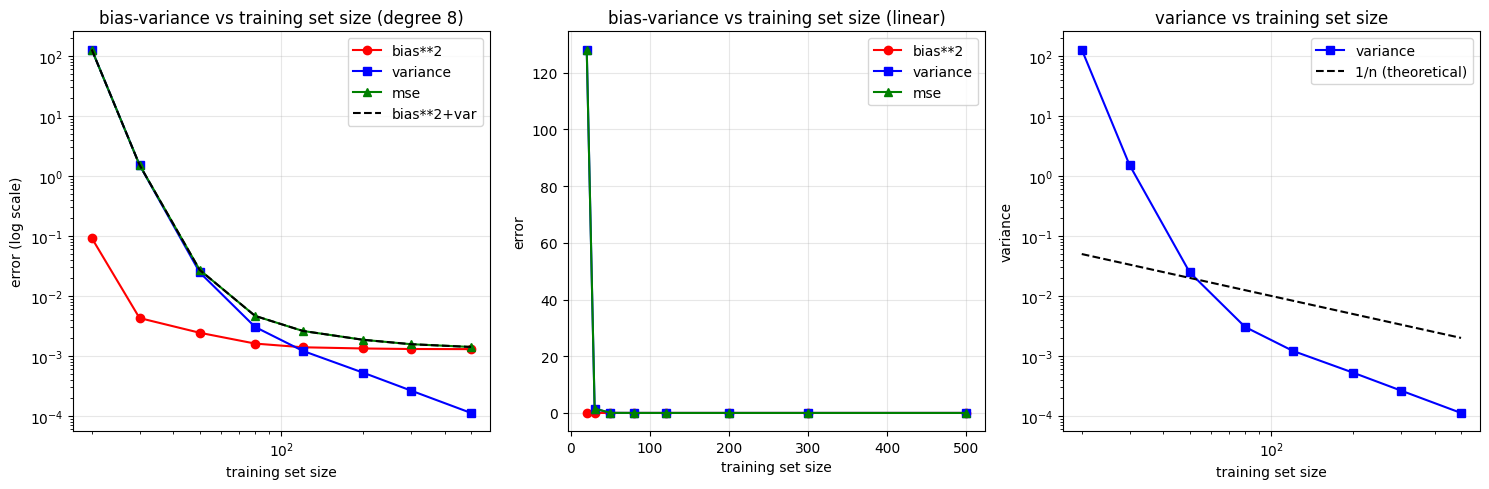


training size   bias**2     var       mse
-------------------------------------------------------
20           0.0927   128.1008   128.1935
30           0.0043   1.5258   1.5301
50           0.0024   0.0247   0.0271
80           0.0016   0.0030   0.0047
120          0.0014   0.0012   0.0026
200          0.0013   0.0005   0.0019
300          0.0013   0.0003   0.0016
500          0.0013   0.0001   0.0014


In [7]:
plt.figure(figsize=(15, 5))

# bias, variance, mse log scale
plt.subplot(1, 3, 1)
plt.loglog(n_samples_list, biases_vs_n, 'r-o', label='bias**2')
plt.loglog(n_samples_list, variances_vs_n, 'b-s', label='variance')
plt.loglog(n_samples_list, mses_vs_n, 'g-^', label='mse')
plt.loglog(n_samples_list, np.array(biases_vs_n)+np.array(variances_vs_n), 'k--', label='bias**2+var')
plt.xlabel('training set size')
plt.ylabel('error (log scale)')
plt.title(f'bias-variance vs training set size (degree {degree})')
plt.legend()
plt.grid(alpha=0.3)

# linear scale
plt.subplot(1, 3, 2)
plt.plot(n_samples_list, biases_vs_n, 'r-o', label='bias**2')
plt.plot(n_samples_list, variances_vs_n, 'b-s', label='variance')
plt.plot(n_samples_list, mses_vs_n, 'g-^', label='mse')
plt.xlabel('training set size')
plt.ylabel('error')
plt.title('bias-variance vs training set size (linear)')
plt.legend()
plt.grid(alpha=0.3)

# variance vs 1/n
plt.subplot(1, 3, 3)
plt.plot(n_samples_list, variances_vs_n, 'b-s', label='variance')
plt.plot(n_samples_list, 1/np.array(n_samples_list), 'k--', label='1/n (theoretical)')
plt.xlabel('training set size')
plt.ylabel('variance')
plt.title('variance vs training set size')
plt.legend()
plt.grid(alpha=0.3)
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()

print("\ntraining size   bias**2     var       mse")
print("-"*55)
for i, n in enumerate(n_samples_list):
    print(f"{n:<13}{biases_vs_n[i]:.4f}   {variances_vs_n[i]:.4f}   {mses_vs_n[i]:.4f}")


Fixing degree p=8 (enough to decently approximate the target), the main effect of increasing n is on variance.  

- at n=20 variance dominates (128.1 vs bias**2=0.0927), giving mse≈128.  
- as n increases variance shrinks ≈1/n:  
  - n=50 → variance=0.0247  
  - n=200 → variance=0.0005  
  - n=500 → variance=0.0001  
- bias**2 stays essentially flat once n≥50 (~0.0013), since model capacity not sample size governs bias.  

MSE reduction is therefore variance-driven: two orders of magnitude drop between n=20 and n=50, then diminishing returns as variance→0. beyond n≈200 the error floor is set by bias, not variance.  

Intepretation: variance reflects sample instability and collapses with sample sizes n. Bias reflects model specification and remains constant along differing sample sizes n. MSE curves flatten as variance $\to$ 0, leaving bias as the limiting factor. This shows that more data as always nice in ML , as it  reduces variance, while only improving model capacity can reduce bias.  




## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

Scaling ensures that the features are on comparable scale, avoiding dominance by large-magnitude variables. It stabilizes numerical computations, i.e when features differ by orders of magnitutde, small floating-point roundoff errors in large-scaled variables overshadow smaller-scaled variables. It also improves the condition of the design matrix $X^\top X$, i.e. it reduces eigenvalue spread; without scaling, large-magnitude features force eigenvalues to scale their eigenvectors along those directions, which makes inversion of $X^\top X$ sensitive because small perturbations in the data propagate strongly along ill-scaled directions


**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

Because the OLS solution $\hat\beta = (X^\top X)^{-1}X^\top y$ is invariant up to linear rescaling of features (by linearity of matrix algebra), i.e multiplying a column of $X$ by a constant $c$ multiplies the corresponding coefficient by $1/c$. The predictions $\hat y = X\hat\beta$ remain unchanged, hence practically equivalent. The only effect is that the scale of coefficients depends on feature scaling, which complicates direct comparison of $\beta$-values across features.


**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?


The ridge estimator is 

$\hat\beta^{ridge} = (X^\top X + \lambda I)^{-1} X^\top y$.  

The penalty term $\lambda \|\beta\|_2^2$ is applied uniformly across coefficients. So if features are on different scales, a coefficient corresponding to a large-scale feature appears large even when its contribution to predictions is modest, and the penalty distorts relative shrinkage. Thus scaling of $X$ directly affects the bias introduced by ridge, unlike in OLS.  
Only on scaled data does the penalty treat all features equivalently, making the ridge solution interpretable and the tradeoff between bias and variance meaningful.

**d)** Why do we say that the Ridge method gives a biased model?

Because ridge modifies the OLS estimator by adding $\lambda I$ to $X^\top X$, the solution  

$
\hat\beta^{ridge} = (X^\top X + \lambda I)^{-1} X^\top y
$

is systematically shifted toward zero. As stated above, this regularization shrinks coefficients even when the true $\beta$ is nonzero, introducing bias. The tradeoff is that variance is reduced, so the overall mean squared error often improves despite the estimator being biased.



**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

Scaling the feature matrix does not affect the MSE, because OLS predictions $\hat y = X\hat\beta$ are invariant to linear rescaling of $X$. The coefficients rescale inversely, leaving residuals and thus MSE unchanged.  
Scaling the target data does affect the MSE, since residuals are measured in the same units as $y$. Multiplying $y$ by a constant $c$ scales both residuals and MSE by $c^2$.


**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

Scaling the feature matrix does not affect the R2 score, since OLS predictions are invariant to rescaling of $X$.   
Scaling the target data also does not affect the 2 ² score, because both residual sum of squares (RSS) and total sum of squares (TSS) scale by the same factor $c^2$, so their ratio — and thus $R^2 = 1 - \tfrac{RSS}{TSS}$ — remains unchanged. 

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

- R2= 0: The model explains none of the variance of the target $y$- or,  predictions are no better than using the mean of $y$.   
- **R² = 0.5**: The model explains half of the variance in $y$.   
- **R² = 1**: The model explains all variance in the $y$ ; predictions are perfect (zero residual error). 

**h)** What is an advantage of the R2 score over the MSE?

R2 is scale-independent: it normalizes the residual variance by the total variance of the target. This makes it easier to interpret and compare across datasets or targets with different units, unlike MSE which depends on the scale of $y$. 

